# Burster Izhikevich - Full vhalf vcutoff

In [1]:
from act.SyntheticGenerator import SyntheticGenerator
from act.act_types import SimulationParameters, OptimizationParameters, CurrentInjection
from act.cell_model import TargetCell
from act.module_parameters import ModuleParameters

random_seed = 52
num_slices_new = 10
num_slices_old = 5
cell_props = "low" # low, high, center
experiment = "range" # blocked, range
experiment_folder = f"output/BursterIzh_Full_vhalf_vcutoff_sl-{num_slices_new}-{num_slices_old}/{random_seed}"
#experiment_folder = f"output/bursterIzh_seg_surfaceTest_sl-{num_slices_new}/{random_seed}"
target_folder = experiment_folder + "/target"

# module 1 is for spiking, module 2 for bursting, final for refining all channels

module_1_folder = experiment_folder + "/module_1"
module_2_folder = experiment_folder + "/module_2"
module_3_folder = experiment_folder + "/module_3"
module_4_folder = experiment_folder + "/module_4"
module_final_folder = experiment_folder + "/module_final"

# We need to order the ion channels according to V1/2:
# im: -52.7
# kdr: 13
# na3: -30 (act), -45 (inact)
# nap: -48
# In order: leak, im, nap, na3, kdr
#actual_g={"gbar_na3": 0.05, "gkdrbar_kdr": 0.03,"gbar_nap": 0.0004,"gmbar_im": 0.0038, "glbar_leak": 3.6e-5}

target_cell = TargetCell(
    path_to_hoc_file=f"/home/mwsrgf/proj/ACT/data/Burster_Izhikevich/seg/template.hoc",
    path_to_mod_files=f"/home/mwsrgf/proj/ACT/data/Burster_Izhikevich/seg",
    cell_name="Burster_Izh",
    active_channels=["gmbar_im", "gbar_nap", "gbar_na3", "gkdrbar_kdr", "glbar_leak"]
)

sim_par= SimulationParameters(
            h_v_init=-67.0,  # Consistent with nrngui settings
            h_tstop=500,     # Simulation time in ms
            h_dt=0.1,      # Time step in ms
            h_celsius=6.3,   # Temperature in degrees Celsius
            CI=[CurrentInjection(type="constant", amp=0.1, dur=300, delay=100),
                CurrentInjection(type="constant", amp=0.3, dur=300, delay=100),
                CurrentInjection(type="constant", amp=0.5, dur=300, delay=100)],
            set_g_to=[]
        )

/home/mwsrgf/act-venv/lib64/python3.9/site-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)
--No graphics will be displayed.


In [2]:
import random

random.seed(random_seed)

gmbar_im = 0.0038
gkdrbar_kdr= 0.03
gbar_nap= 0.0004
gbar_na3= 0.05
glbar_leak= 3.6e-5

im_low_offset = random.uniform(0,gmbar_im/2)
nap_low_offset = random.uniform(0,gbar_nap/2)
na3_low_offset = random.uniform(0,gbar_na3/2)
kdr_low_offset = random.uniform(0,gkdrbar_kdr/2)

im_low = gmbar_im - im_low_offset
im_high = gmbar_im + ((gmbar_im/2) - im_low_offset)

nap_low = gbar_nap - nap_low_offset
nap_high = gbar_nap + ((gbar_nap/2) - nap_low_offset)

na3_low = gbar_na3 - na3_low_offset
na3_high = gbar_na3 + ((gbar_na3/2) - na3_low_offset)

kdr_low = gkdrbar_kdr - kdr_low_offset
kdr_high = gkdrbar_kdr + ((gkdrbar_kdr/2) - kdr_low_offset)


print(f"im: ({im_low},{im_high}) -- TRUE: {gmbar_im}")
print(f"nap: ({nap_low},{nap_high}) -- TRUE: {gbar_nap}")
print(f"na3: ({na3_low},{na3_high}) -- TRUE: {gbar_na3}")
print(f"kdr: ({kdr_low},{kdr_high}) -- TRUE: {gkdrbar_kdr}")

print("-------------")
print("Range (high - low) ")
print(f"im range: {im_high - im_low} -- 50% TRUE: {gmbar_im/2}")
print(f"nap range: {nap_high - nap_low} -- 50% TRUE: {gbar_nap/2}")
print(f"na3 range: {na3_high - na3_low} -- 50% TRUE: {gbar_na3/2}")
print(f"kdr range: {kdr_high - kdr_low} -- 50% TRUE: {gkdrbar_kdr/2}")

im: (0.0019411257690951063,0.003841125769095106) -- TRUE: 0.0038
nap: (0.00038909546899790854,0.0005890954689979085) -- TRUE: 0.0004
na3: (0.03185845697064188,0.05685845697064188) -- TRUE: 0.05
kdr: (0.02274207385013336,0.03774207385013336) -- TRUE: 0.03
-------------
Range (high - low) 
im range: 0.0018999999999999998 -- 50% TRUE: 0.0019
nap range: 0.00019999999999999998 -- 50% TRUE: 0.0002
na3 range: 0.025 -- 50% TRUE: 0.025
kdr range: 0.015 -- 50% TRUE: 0.015


# Generate Synthetic Data

In [3]:
sg = SyntheticGenerator(
    ModuleParameters(
        module_folder_name=target_folder,
        cell= target_cell,
        sim_params= sim_par
    )
)

sg.generate_synthetic_target_data("target_data.csv")


        ACTSimulator (2024)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
/home/mwsrgf/proj/ACT/experiments/BursterIzhikevich/not-filtered/output/BursterIzh_Full_vhalf_vcutoff_sl-10-5/52/target/synthetic_0.1_0.3_0.5


In [4]:
#import matplotlib.pyplot as plt
#import numpy as np

#data = np.load("/home/mwsrgf/proj/ACT/output/bursterIzh_seg_filtered_sl-10/42/module_1/train/combined_out.npy")

#Volt = data[:,:,0]

#plt.plot(Volt[1,:])

In [5]:
passive_sim_par = SimulationParameters(
            h_v_init = -67,
            h_tstop = 1500,
            h_dt = 0.001,
            h_celsius = 6.3,
            CI=[CurrentInjection(type="constant", amp=-1, dur=1000, delay=500)],
            set_g_to=[]
        )

sg_passive = SyntheticGenerator(
    ModuleParameters(
        module_folder_name=target_folder,
        cell= target_cell,
        sim_params= passive_sim_par
    )
)

sg_passive.generate_synthetic_target_data("passive_data.csv")


        ACTSimulator (2024)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
/home/mwsrgf/proj/ACT/experiments/BursterIzhikevich/not-filtered/output/BursterIzh_Full_vhalf_vcutoff_sl-10-5/52/target/synthetic_-1


# Get Passive Properties

In [6]:
from act.PassivePropertiesModule import PassivePropertiesModule
from act.act_types import SimulationParameters
from act.cell_model import TrainCell

train_cell = TrainCell(
    path_to_hoc_file=f"/home/mwsrgf/proj/ACT/data/Burster_Izhikevich/seg/template.hoc",
    path_to_mod_files=f"/home/mwsrgf/proj/ACT/data/Burster_Izhikevich/seg",
    cell_name="Burster_Izh",
    active_channels = ["gmbar_im", "gbar_nap", "gbar_na3", "gkdrbar_kdr", "glbar_leak"]
)

passive_mod = PassivePropertiesModule(
    train_cell=train_cell,
    sim_params=passive_sim_par,
    trace_filepath=f"{target_folder}/passive_data.csv",
    leak_conductance_variable="glbar_leak",
    leak_reversal_variable="el_leak"
)

In [7]:
passive_mod.set_passive_properties()
print(train_cell.passive_properties)

Found 1 section(s) in this cell. Calculating the total surface area of the cell.
PassiveProperties(V_rest=-70.07262004640518, R_in=306.36820650467416, tau=69.423, Cm=2.499821798209222, g_bar_leak=3.60085533354828e-05, cell_area=9.064641486925113e-05, leak_conductance_variable='glbar_leak', leak_reversal_variable='el_leak')


## Run Module 1 im

In [8]:
from act.ACTModule import ACTModule
from act.act_types import OptimizationParameters, OptimizationParameters, ConductanceOptions, FilterParameters
from act.module_parameters import ModuleParameters


mod1 = ACTModule(
    ModuleParameters(
        module_folder_name=module_1_folder,
        cell= train_cell,
        target_traces_file = f"{target_folder}/target_data.csv",
        sim_params= sim_par,
        optim_params= OptimizationParameters(
            conductance_options= [
                ConductanceOptions(variable_name="gmbar_im", low=im_low, high=im_high, n_slices=num_slices_new),
                ConductanceOptions(variable_name="gbar_nap", low=nap_low, high=nap_high, n_slices=1),
                ConductanceOptions(variable_name="gbar_na3", low=na3_low, high=na3_high, n_slices=1),
                ConductanceOptions(variable_name="gkdrbar_kdr", low=kdr_low, high=kdr_high, n_slices=1),
                ConductanceOptions(variable_name="glbar_leak", prediction=train_cell.passive_properties.g_bar_leak, bounds_variation=0.0, n_slices=1)
            ],
            filter_parameters= FilterParameters(
                #filtered_out_features = ["no_spikes", "saturated"],
                saturation_threshold=-55,
                window_of_inspection=(120,400)
            ),
            train_features=["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats"],
            prediction_eval_method='features',
            spike_threshold=0,
            first_n_spikes=20,
            random_state=random_seed,
            save_file=f"{module_1_folder}/results/saved_metrics.json"
        )
    )
)

In [9]:
predicted_g_data_file = mod1.run()

RUNNING THE MODULE
LOADING TARGET TRACES
SIMULATING TRAINING DATA

        ACTSimulator (2024)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
Getting Parameter Combinations
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.0019411257690951063, 0.0004890954689979086, 0.04435845697064188, 0.03024207385013336, 3.60085533354828e-05)
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.0019411257690951063, 0.0004890954689979086, 0.04435845697064188, 0.03024207385013336, 3.60085533354828e-05)
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.0019411257690951063, 0.0004890954689979086, 0.04435845697064188, 0.03024207385013336, 3.60085533354828e-05)
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.0021522368802062175, 0.0004890954689979086, 0.04435845697064188, 0.03024207385013336, 3.60085533354828e-05)
Setting ['gmba

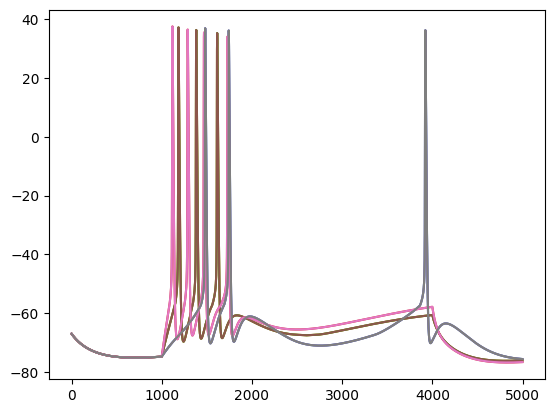

In [10]:
import numpy as np

data = np.load("./output/BursterIzh_Full_vhalf_vcutoff_sl-10-5/52/module_1/train/combined_out.npy")

Voltage = data[:,:,0]
Current = data[:,:,1]
g = data[:,:,2]

import matplotlib.pyplot as plt

plt.plot(Voltage[0])
plt.plot(Voltage[1])
plt.plot(Voltage[2])
plt.plot(Voltage[3])
plt.plot(Voltage[4])
plt.plot(Voltage[5])
plt.plot(Voltage[6])
plt.plot(Voltage[7])
plt.show()

In [11]:
mod1.pickle_rf(mod1.rf_model,f"{module_1_folder}/trained_rf.pkl")
print(train_cell.predicted_g)

{'gmbar_im': 0.003800000000000024, 'gbar_nap': 0.00040000000000000734, 'gbar_na3': 0.049999999999999295, 'gkdrbar_kdr': 0.03000000000000038, 'glbar_leak': 3.6000000000000604e-05}


## Run Module 2 nap

In [12]:
from act.ACTModule import ACTModule
from act.act_types import OptimizationParameters, OptimizationParameters, ConductanceOptions, FilterParameters
from act.module_parameters import ModuleParameters

# Allow all channels to vary by 20% their predicted value in the previous module
bounds_variation = 0.15

# gmbar_im = 0.0038, gkdrbar_kdr= 0.03, gbar_nap= 0.0004, gbar_na3= 0.05, glbar_leak= 3.6e-5
mod2 = ACTModule(
    ModuleParameters(
        module_folder_name=module_2_folder,
        cell= train_cell,
        target_traces_file = f"{target_folder}/target_data.csv",
        sim_params= sim_par,
        optim_params= OptimizationParameters(
            conductance_options = [
                ConductanceOptions(variable_name="gmbar_im", prediction=train_cell.predicted_g["gmbar_im"], bounds_variation=train_cell.predicted_g["gmbar_im"]*bounds_variation, n_slices=num_slices_old),
                ConductanceOptions(variable_name="gbar_nap", low=nap_low, high=nap_high, n_slices=num_slices_new),
                ConductanceOptions(variable_name="gbar_na3", low=na3_low, high=na3_high, n_slices=1),
                ConductanceOptions(variable_name="gkdrbar_kdr", low=kdr_low, high=kdr_high, n_slices=1),
                ConductanceOptions(variable_name="glbar_leak", prediction=train_cell.passive_properties.g_bar_leak, bounds_variation=0.0, n_slices=1)
            ],
            filter_parameters= FilterParameters(
                #filtered_out_features = ["no_spikes", "saturated"],
                saturation_threshold=-55,
                window_of_inspection=(120,400)
            ),
            train_features=["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats"],
            prediction_eval_method='features',
            spike_threshold=0,
            first_n_spikes=20,
            random_state=random_seed,
            save_file=f"{module_2_folder}/results/saved_metrics.json"
        )
    )
)

In [13]:
predicted_g_data_file = mod2.run()

RUNNING THE MODULE
LOADING TARGET TRACES
SIMULATING TRAINING DATA

        ACTSimulator (2024)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
Getting Parameter Combinations
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000024, 0.00038909546899790854, 0.04435845697064188, 0.03024207385013336, 3.60085533354828e-05)
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000024, 0.00038909546899790854, 0.04435845697064188, 0.03024207385013336, 3.60085533354828e-05)
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000024, 0.00038909546899790854, 0.04435845697064188, 0.03024207385013336, 3.60085533354828e-05)
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000024, 0.00041131769122013074, 0.04435845697064188, 0.03024207385013336, 3.60085533354828e-05)
Setting ['gmba

In [14]:
mod2.pickle_rf(mod2.rf_model,f"{module_2_folder}/trained_rf.pkl")
print(train_cell.predicted_g)

{'gmbar_im': 0.003800000000000024, 'gbar_nap': 0.00040000000000000734, 'gbar_na3': 0.04999999999999929, 'gkdrbar_kdr': 0.03000000000000038, 'glbar_leak': 3.6000000000000604e-05}


# Module 3 na3

In [15]:
from act.ACTModule import ACTModule
from act.act_types import OptimizationParameters, OptimizationParameters, ConductanceOptions, FilterParameters
from act.module_parameters import ModuleParameters

# Allow all channels to vary by 20% their predicted value in the previous module
bounds_variation = 0.15

# gmbar_im = 0.0038, gkdrbar_kdr= 0.03, gbar_nap= 0.0004, gbar_na3= 0.05, glbar_leak= 3.6e-5
mod3 = ACTModule(
    ModuleParameters(
        module_folder_name=module_3_folder,
        cell= train_cell,
        target_traces_file = f"{target_folder}/target_data.csv",
        sim_params= sim_par,
        optim_params= OptimizationParameters(
            conductance_options = [
                ConductanceOptions(variable_name="gmbar_im", prediction=train_cell.predicted_g["gmbar_im"], bounds_variation=train_cell.predicted_g["gmbar_im"]*bounds_variation, n_slices=num_slices_old),
                ConductanceOptions(variable_name="gbar_nap", prediction=train_cell.predicted_g["gbar_nap"], bounds_variation=train_cell.predicted_g["gbar_nap"]*bounds_variation, n_slices=num_slices_old),
                ConductanceOptions(variable_name="gbar_na3", low=na3_low, high=na3_high, n_slices=num_slices_new),
                ConductanceOptions(variable_name="gkdrbar_kdr", low=kdr_low, high=kdr_high, n_slices=1),
                ConductanceOptions(variable_name="glbar_leak", prediction=train_cell.passive_properties.g_bar_leak, bounds_variation=0.0, n_slices=1)
            ],
            filter_parameters= FilterParameters(
                #filtered_out_features = ["no_spikes", "saturated"],
                saturation_threshold=-55,
                window_of_inspection=(120,400)
            ),
            train_features=["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats"],
            prediction_eval_method='features',
            spike_threshold=0,
            first_n_spikes=20,
            random_state=random_seed,
            save_file=f"{module_3_folder}/results/saved_metrics.json"
        )
    )
)

In [16]:
predicted_g_data_file = mod3.run()

RUNNING THE MODULE
LOADING TARGET TRACES
SIMULATING TRAINING DATA

        ACTSimulator (2024)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
Getting Parameter Combinations
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000024, 0.00039997600000000734, 0.03185845697064188, 0.03024207385013336, 3.60085533354828e-05)
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000024, 0.00039997600000000734, 0.03185845697064188, 0.03024207385013336, 3.60085533354828e-05)
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000024, 0.00039997600000000734, 0.03185845697064188, 0.03024207385013336, 3.60085533354828e-05)
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000024, 0.00039997600000000734, 0.034636234748419654, 0.03024207385013336, 3.60085533354828e-05)
Setting ['gmb

In [17]:
mod3.pickle_rf(mod3.rf_model,f"{module_3_folder}/trained_rf.pkl")
print(train_cell.predicted_g)

{'gmbar_im': 0.003800000000000025, 'gbar_nap': 0.00040000000000000793, 'gbar_na3': 0.04999999999999931, 'gkdrbar_kdr': 0.030000000000000384, 'glbar_leak': 3.600000000000067e-05}


# Module 4 kdr

In [18]:
from act.ACTModule import ACTModule
from act.act_types import OptimizationParameters, OptimizationParameters, ConductanceOptions, FilterParameters
from act.module_parameters import ModuleParameters

# Allow all channels to vary by 20% their predicted value in the previous module
bounds_variation = 0.15

# gmbar_im = 0.0038, gkdrbar_kdr= 0.03, gbar_nap= 0.0004, gbar_na3= 0.05, glbar_leak= 3.6e-5
mod4 = ACTModule(
    ModuleParameters(
        module_folder_name=module_4_folder,
        cell= train_cell,
        target_traces_file = f"{target_folder}/target_data.csv",
        sim_params= sim_par,
        optim_params= OptimizationParameters(
            conductance_options = [
                ConductanceOptions(variable_name="gmbar_im", prediction=train_cell.predicted_g["gmbar_im"], bounds_variation=train_cell.predicted_g["gmbar_im"]*bounds_variation, n_slices=num_slices_old),
                ConductanceOptions(variable_name="gbar_nap", prediction=train_cell.predicted_g["gbar_nap"], bounds_variation=train_cell.predicted_g["gbar_nap"]*bounds_variation, n_slices=num_slices_old),
                ConductanceOptions(variable_name="gbar_na3", prediction=train_cell.predicted_g["gbar_na3"], bounds_variation=train_cell.predicted_g["gbar_na3"]*bounds_variation, n_slices=num_slices_old),
                ConductanceOptions(variable_name="gkdrbar_kdr", low=kdr_low, high=kdr_high, n_slices=num_slices_new),
                ConductanceOptions(variable_name="glbar_leak", prediction=train_cell.passive_properties.g_bar_leak, bounds_variation=0.0, n_slices=1)
            ],
            filter_parameters= FilterParameters(
                #filtered_out_features = ["no_spikes", "saturated"],
                saturation_threshold=-55,
                window_of_inspection=(120,400)
            ),
            train_features=["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats"],
            prediction_eval_method='features',
            spike_threshold=0,
            first_n_spikes=20,
            random_state=random_seed,
            save_file=f"{module_4_folder}/results/saved_metrics.json"
        )
    )
)

In [19]:
predicted_g_data_file = mod4.run()

RUNNING THE MODULE
LOADING TARGET TRACES
SIMULATING TRAINING DATA

        ACTSimulator (2024)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
Getting Parameter Combinations
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000025, 0.00039997600000000794, 0.04962499999999932, 0.02274207385013336, 3.60085533354828e-05)
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000025, 0.00039997600000000794, 0.04962499999999932, 0.02274207385013336, 3.60085533354828e-05)
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000025, 0.00039997600000000794, 0.04962499999999932, 0.02274207385013336, 3.60085533354828e-05)
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000025, 0.00039997600000000794, 0.04962499999999932, 0.024408740516800028, 3.60085533354828e-05)
Setting ['gmb

In [20]:
mod4.pickle_rf(mod4.rf_model,f"{module_4_folder}/trained_rf.pkl")
print(train_cell.predicted_g)

{'gmbar_im': 0.003800000000000025, 'gbar_nap': 0.00039999999999999503, 'gbar_na3': 0.0499999999999994, 'gkdrbar_kdr': 0.03000000000000108, 'glbar_leak': 3.5999999999999066e-05}


## Run Fine Tuning Module

In [21]:
from act.ACTModule import ACTModule
from act.act_types import OptimizationParameters, OptimizationParameters, ConductanceOptions, FilterParameters
from act.module_parameters import ModuleParameters

bounds_variation = 0.15

final_mod = ACTModule(
    ModuleParameters(
        module_folder_name=module_final_folder,
        cell= train_cell,
        target_traces_file = f"{target_folder}/target_data.csv",
        sim_params= sim_par,
        optim_params= OptimizationParameters(
            conductance_options = [
                ConductanceOptions(variable_name="gmbar_im", prediction=train_cell.predicted_g["gmbar_im"], bounds_variation=train_cell.predicted_g["gmbar_im"]*bounds_variation, n_slices=num_slices_old),
                ConductanceOptions(variable_name="gbar_nap", prediction=train_cell.predicted_g["gbar_nap"], bounds_variation=train_cell.predicted_g["gbar_nap"]*bounds_variation, n_slices=num_slices_old),
                ConductanceOptions(variable_name="gbar_na3", prediction=train_cell.predicted_g["gbar_na3"], bounds_variation=train_cell.predicted_g["gbar_na3"]*bounds_variation, n_slices=num_slices_old),
                ConductanceOptions(variable_name="gkdrbar_kdr", prediction=train_cell.predicted_g["gkdrbar_kdr"], bounds_variation=train_cell.predicted_g["gkdrbar_kdr"]*bounds_variation, n_slices=num_slices_old),
                ConductanceOptions(variable_name="glbar_leak", prediction=train_cell.passive_properties.g_bar_leak, bounds_variation=0.0, n_slices=1)
            ],
            filter_parameters= FilterParameters(
                #filtered_out_features = ["no_spikes", "saturated"],
                saturation_threshold=-55,
                window_of_inspection=(120,400)
            ),
            train_features=["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats"],
            spike_threshold=0,
            first_n_spikes=20,
            prediction_eval_method='features',
            random_state=random_seed,
            save_file=f"{module_final_folder}/results/saved_metrics.json"
        )
    )
)

In [22]:
final_predicted_g_data_file = final_mod.run()

RUNNING THE MODULE
LOADING TARGET TRACES
SIMULATING TRAINING DATA

        ACTSimulator (2024)
        ----------
        When submitting multiple jobs, note that the cells must share modfiles.
        
Getting Parameter Combinations
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000025, 0.00039997599999999503, 0.049624999999999406, 0.02986500000000107, 3.60085533354828e-05)
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000025, 0.00039997599999999503, 0.049624999999999406, 0.02986500000000107, 3.60085533354828e-05)
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000025, 0.00039997599999999503, 0.049624999999999406, 0.02986500000000107, 3.60085533354828e-05)
Setting ['gmbar_im', 'gbar_nap', 'gbar_na3', 'gkdrbar_kdr', 'glbar_leak'] to (0.003797834000000025, 0.00039997599999999503, 0.049624999999999406, 0.029932500000001076, 3.60085533354828e-05)
Setting [

In [23]:
final_mod.pickle_rf(final_mod.rf_model,f"{module_final_folder}/trained_rf.pkl")
print(train_cell.predicted_g)

{'gmbar_im': 0.003800000000000025, 'gbar_nap': 0.00040000000000000707, 'gbar_na3': 0.0499999999999989, 'gkdrbar_kdr': 0.030000000000000925, 'glbar_leak': 3.6000000000000726e-05}


# Results & Metrics

In [24]:
from act import ACTPlot
ACTPlot.plot_v_comparison(
    final_predicted_g_data_file, 
    module_final_folder, 
    sim_par.CI,
    sim_par.h_dt
    )

ACTPlot.plot_fi_comparison(
    module_final_folder, 
    sim_par.CI
    )

In [25]:
from act.Metrics import Metrics

metrics = Metrics()

mean, stdev = metrics.save_interspike_interval_comparison(
    module_final_folder,
    final_predicted_g_data_file,
    sim_par.CI, 
    sim_par.h_dt,
    first_n_spikes=5,
    save_file=f"{module_final_folder}/results/saved_metrics.json"
)

actual_g={"gbar_na3": 0.05, "gkdrbar_kdr": 0.03,"gbar_nap": 0.0004,"gmbar_im": 0.0038, "glbar_leak": 3.6e-5}
 
    
metrics.save_prediction_g_mae(
    actual_g=actual_g,
    save_file=f"{module_final_folder}/results/saved_metrics.json"
)

metrics.save_feature_mae(
    module_final_folder,
    final_predicted_g_data_file,
    ["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats"],
    sim_par.h_dt,
    first_n_spikes=5,
    save_file=f"{module_final_folder}/results/saved_metrics.json"
)


Interspike times (Target): [[2.61e+01 2.18e+02 1.00e+06 1.00e+06]
 [1.97e+01 2.32e+01 1.00e+06 1.00e+06]
 [1.69e+01 1.81e+01 2.61e+01 1.00e+06]]
Interspike times (Prediction): [[2.61e+01 2.18e+02 1.00e+06 1.00e+06]
 [1.97e+01 2.32e+01 1.00e+06 1.00e+06]
 [1.69e+01 1.81e+01 2.61e+01 1.00e+06]]
MAE for each I injection: [0.0, 0.0, 0.0]
Mean interspike-interval MAE: 0.0
Standard Deviation interspike-interval MAE: 0.0
MAE of final g prediction: 0.030319999999999958
MAE of summary features for final prediction: 0.0


# Feature MAE

Smallest MAE values (gbar_na3, gkdrbar_kdr, Summary Stats MAE): 
[[0.0038 0.0004 0.    ]]


TypeError: Input z must be at least a (2, 2) shaped array, but has shape (1, 1)

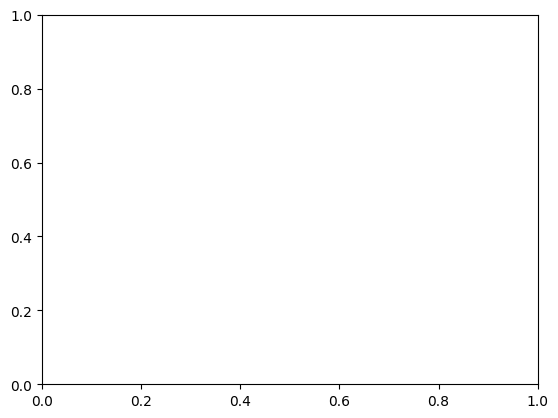

In [26]:
from act import ACTPlot as actplt

g_names = ["gbar_na3", "gkdrbar_kdr","gbar_nap","gmbar_im"]

for i in range(len(g_names)-1):
    actplt.plot_training_feature_mae_contour_plot(
        module_final_folder,
        sim_par.CI,
        sim_par.CI[0].delay,
        sim_par.h_dt,
        index1=0,
        index2=i+1,
        g_names=g_names,
        train_features=["i_trace_stats", "number_of_spikes", "spike_times", "spike_height_stats", "trough_times", "trough_height_stats"],
        threshold=0,
        first_n_spikes=20,
        num_levels=100,
        results_filename=f"{module_final_folder}/results/Feature_MAE_Contour_Plot_{g_names[0]}_{g_names[i+1]}.png"
    )

# FI MAE

In [ ]:
from act import ACTPlot as actplt

g_names = ["gbar_na3", "gkdrbar_kdr","gbar_nap","gmbar_im"]

for i in range(len(g_names)-1):
    actplt.plot_training_fi_mae_contour_plot(
        module_final_folder,
        sim_par.CI, 
        sim_par.CI[0].dur,
        sim_par.CI[0].delay,
        sim_par.h_dt,
        index1=0,
        index2=i+1,
        g_names=g_names,
        results_filename=f"{module_final_folder}/results/FI_MAE_Contour_Plot_{g_names[0]}_{g_names[i+1]}.png"
    )

# Voltage MAE

In [ ]:
from act import ACTPlot as actplt

g_names = ["gbar_na3", "gkdrbar_kdr","gbar_nap","gmbar_im"]

for i in range(len(g_names)-1):
    actplt.plot_training_v_mae_contour_plot(
        module_final_folder,
        sim_par.CI, 
        sim_par.CI[0].delay,
        sim_par.h_dt,
        index1=0,
        index2=i+1,
        g_names=g_names,
        results_filename=f"{module_final_folder}/results/Voltage_MAE_Contour_Plot_{g_names[0]}_{g_names[i+1]}.png"
    )